In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)


In [10]:
co2_proxy_data = pd.read_excel('age_co2_plot_data.xlsx')
co2_proxy_data.head()

,xls,site_name,proxy,age,age_uncertainty_older,age_uncertainty_younger,co2,co2_uncertainty_higher,co2_uncertainty_lower,reference,doi,co2_as_published,proxy_category,category_reason,co2_superseded,co2_recalculated,co2_revised_reason,age_as_published,age_quarantined,age_superseded,age_recalculated,age_revised_reason,modern_longitude,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,liverwort_kowalczyk_2018_p1.0.xlsx,all known sources of error have been quantifie...,Liverworts,63800.00,200.0,200.0,813.00,592.00,304.00,"Kowalczyk, J. B., Royer, D. L., Miller, I. M.,...",10.1029/2018PA003356,True,1,all known sources of error have been quantifie...,NaN,0.0,NaN,1.0,False,NaN,0.0,NaN,-104.85,NaN,NaN,NaN,NaN,NaN,NaN
1,phytoplankton_badger_2019_p1.0.xlsx,Category 1: (a) Weighted mean of all methods w...,Phytoplankton,111.32,4.0,4.0,224.31,271.38,88.59,"Badger, M. P., Chalk, T. B., Foster, G. L., Bo...",Badger 2019,False,1,Category 1: (a) Weighted mean of all methods w...,False,1.0,Recalculation of all alkenone CO2 results usin...,1.0,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,phytoplankton_badger_2019_p1.0.xlsx,Category 1: (a) Weighted mean of all methods w...,Phytoplankton,119.06,4.0,4.0,258.08,344.16,107.04,"Badger, M. P., Chalk, T. B., Foster, G. L., Bo...",Badger 2019,False,1,Category 1: (a) Weighted mean of all methods w...,False,1.0,Recalculation of all alkenone CO2 results usin...,1.0,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,phytoplankton_badger_2019_p1.0.xlsx,Category 1: (a) Weighted mean of all methods w...,Phytoplankton,123.77,4.0,4.0,254.20,319.57,104.02,"Badger, M. P., Chalk, T. B., Foster, G. L., Bo...",Badger 2019,False,1,Category 1: (a) Weighted mean of all methods w...,False,1.0,Recalculation of all alkenone CO2 results usin...,1.0,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,phytoplankton_badger_2019_p1.0.xlsx,Category 1: (a) Weighted mean of all methods w...,Phytoplankton,127.48,4.0,4.0,278.75,371.23,115.89,"Badger, M. P., Chalk, T. B., Foster, G. L., Bo...",Badger 2019,False,1,Category 1: (a) Weighted mean of all methods w...,False,1.0,Recalculation of all alkenone CO2 results usin...,1.0,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
co2_reconstruction_1Myr = pd.read_csv('https://github.com/SPATIAL-Lab/CenoCO2/raw/v1.1/out/1MyrCO2.csv')
co2_reconstruction_1Myr.head()

,ages,2.5%,25%,50%,75%,97.5%
0,67.5,6.675608,6.804247,6.873216,6.948034,7.106716
1,66.5,6.895596,6.960901,6.995752,7.031682,7.099256
2,65.5,6.570534,6.679263,6.735650,6.791799,6.902112
3,64.5,6.349770,6.479732,6.551309,6.623296,6.777850
4,63.5,6.154094,6.422966,6.546085,6.666050,6.919661


In [45]:
def plot_co2_data(df, age_range=(55000, 0), pCO2_range=(0, 1000), y_axis_type='linear', with_error_bars=True, 
                  proxy_category_1=True, proxy_category_2=True, model_df=None):

    if proxy_category_1 and proxy_category_2:
        pass    
    elif proxy_category_1:
        df = df[df['proxy_category'] == 1]
    elif proxy_category_2:
        df = df[df['proxy_category'] == 2]
        
    df['age_Ma']= df['age'] / 1000
# Creating a colormap for 'proxy' categories
    unique_proxies = df['proxy'].unique()
    colors = plt.cm.get_cmap('tab10', len(unique_proxies))
    color_map = dict(zip(unique_proxies, colors.colors))
    

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    for proxy in unique_proxies:
        proxy_df = df[df['proxy'] == proxy]
        if with_error_bars:
            ax.errorbar(proxy_df['age_Ma'], proxy_df['co2'], 
                        yerr=[proxy_df['co2'] - proxy_df['co2_uncertainty_lower'], 
                              proxy_df['co2']+proxy_df['co2_uncertainty_higher']],
                        fmt='o', ecolor='gray', alpha=0.5, color=color_map[proxy], label=proxy)
        else:
            ax.scatter(proxy_df['age_Ma'], proxy_df['co2'], color=color_map[proxy], label=proxy)

    if y_axis_type == 'log':
        ax.set_yscale('log')

    ax.legend(title='Proxy')
    ax.set_xlim(age_range)
    ax.set_ylim(pCO2_range)
    
    ax.set_xlabel('Age')
    ax.set_ylabel('CO2 Concentration')
    
    if model_df is not None:
        ax.plot(model_df['ages'], np.exp(model_df['50%']), color='black', linestyle='--', label='Model')
        plt.fill_between(model_df['ages'], np.exp(model_df['2.5%']), np.exp(model_df['97.5%']), color='grey', alpha=0.5)
        ax.legend()

    plt.show()

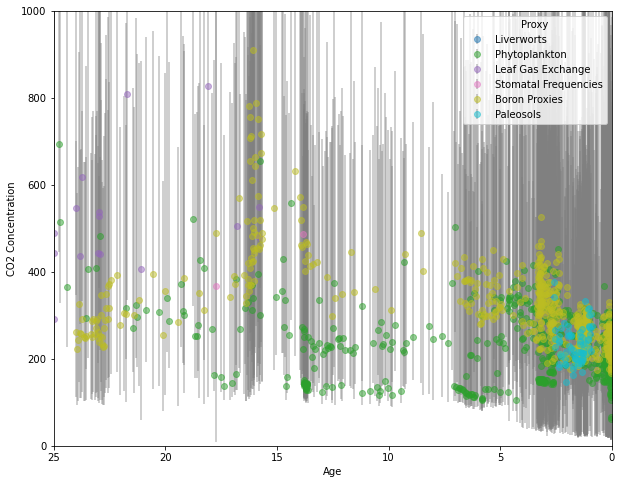

In [46]:
plot_co2_data(co2_proxy_data,age_range=(25, 0))

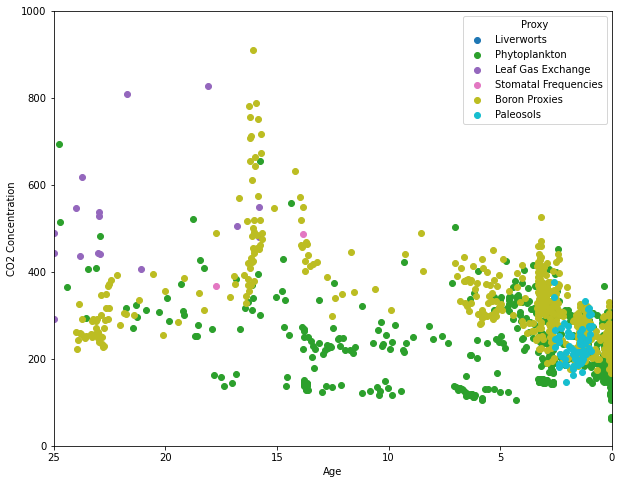

In [47]:
plot_co2_data(co2_proxy_data,age_range=(25, 0),with_error_bars=False, pCO2_range=(0, 1000))

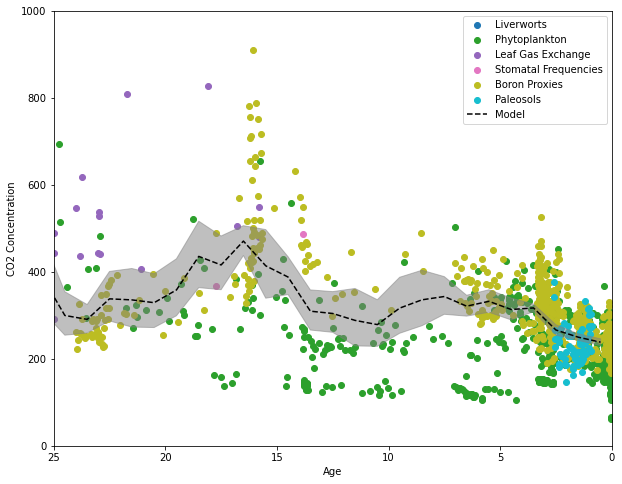

In [48]:
plot_co2_data(co2_proxy_data,age_range=(25, 0),with_error_bars=False, pCO2_range=(0, 1000), 
              proxy_category_1=True, proxy_category_2=False, model_df=co2_reconstruction_1Myr)

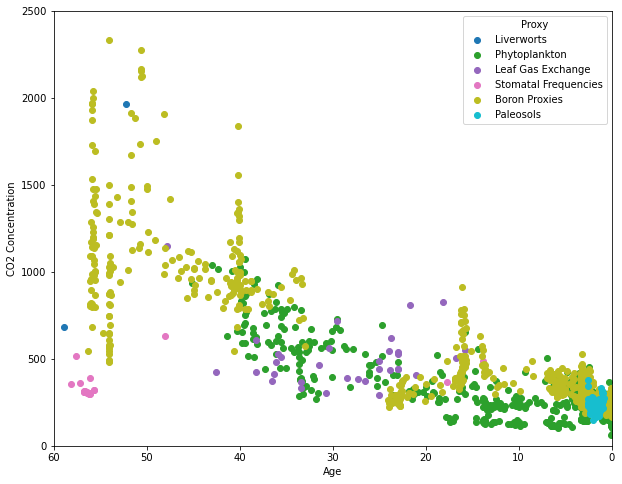

In [50]:
plot_co2_data(co2_proxy_data,age_range=(60, 0),with_error_bars=False, pCO2_range=(0, 2500))

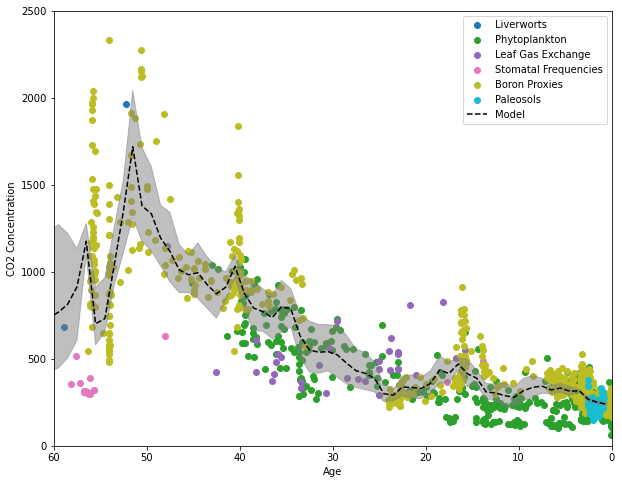

In [51]:
plot_co2_data(co2_proxy_data,age_range=(60, 0),with_error_bars=False, pCO2_range=(0, 2500), 
              proxy_category_1=True, proxy_category_2=False, model_df=co2_reconstruction_1Myr)